<a href="https://www.kaggle.com/code/bukolaajayi/go-daddy-competition-project?scriptVersionId=122587727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Goal:
To estimate or forecast the monthly density of microbusinesses in a specific area. 

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/revealed_test.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [2]:
#reading the dataset
df_Sub = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv')
df_Starter = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')
df_Train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
df_Test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')

In [3]:
#checking out number of rows and columns of each dataset
print(df_Train.shape)
print(df_Test.shape)
print(df_Sub.shape)
print(df_Starter.shape)

(122265, 7)
(25080, 3)
(25080, 2)
(3142, 26)


In [4]:
#information on the test dataset
df_Test.head(3)

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01


In [5]:
#unique dates in test dataset
df_Test.first_day_of_month.unique()

array(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
       '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
      dtype=object)

Test dataset spans from, November 2022 through June 2023.

In [6]:
print('The minimum date given for the train dataset:', df_Test['first_day_of_month'].min())
print('The maximum date given for the train dataset:', df_Test['first_day_of_month'].max())

The minimum date given for the train dataset: 2022-11-01
The maximum date given for the train dataset: 2023-06-01


In [7]:
#information on train datset
df_Train.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198


In [8]:
df_Train.first_day_of_month.unique()

array(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
       '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
       '2022-08-01', '2022-09-01', '2022-10-01'], dtype=object)

Train dataset spans from August 2019 through October 2022.

In [9]:
print('The number of states:', df_Train['state'].nunique())
print('The minimum date given for the train dataset:',  df_Train['first_day_of_month'].min())
print('The maximum date given for the train dataset:',  df_Train['first_day_of_month'].max())

The number of states: 51
The minimum date given for the train dataset: 2019-08-01
The maximum date given for the train dataset: 2022-10-01


Along with the row id, cfips, county, and state, first day of month, microbusiness density, and active fields are included in `train data`. 

Only row id, cfips, and first day of month are present in the `test data`. 

Microbusiness density for a specific cfips and at a specific first day of month is the value to be predicted.

## What number of cfips are there?
Let's now investigate the cfips data.

In [10]:
df_Train['cfips'].nunique(), df_Test['cfips'].nunique(), df_Starter['cfips'].nunique()

(3135, 3135, 3142)

- We have test and train data totaling 3135 cfips.
- There are 3142 cfips overall (according to census statistics).
- The train and test datasets do not contain all of the cfips for which we do have census data.

## Data Cleaning

In [11]:
#converting the date to datetime
df_Test['first_day_of_month'] = pd.to_datetime(df_Test['first_day_of_month'])
df_Train['first_day_of_month'] = pd.to_datetime(df_Train['first_day_of_month'])

In [12]:
#converting the date to datetime
df_Test['first_day_of_month'] = pd.to_datetime(df_Test['first_day_of_month'])
df_Train['first_day_of_month'] = pd.to_datetime(df_Train['first_day_of_month'])

In [13]:
df_Train['year'] = df_Train['first_day_of_month'].dt.year
df_Train['month'] = df_Train['first_day_of_month'].dt.month

In [14]:
#merging the train and starter dataset on cfips column
df_trainMerged = df_Train.merge(df_Starter, on = 'cfips', how = 'left')
df_trainMerged.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [15]:
#checking if there are null values
df_trainMerged.isna().sum()

row_id                    0
cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density     0
active                    0
year                      0
month                     0
pct_bb_2017               0
pct_bb_2018               0
pct_bb_2019               0
pct_bb_2020               0
pct_bb_2021               0
pct_college_2017          0
pct_college_2018          0
pct_college_2019          0
pct_college_2020          0
pct_college_2021          0
pct_foreign_born_2017     0
pct_foreign_born_2018     0
pct_foreign_born_2019     0
pct_foreign_born_2020     0
pct_foreign_born_2021     0
pct_it_workers_2017       0
pct_it_workers_2018      39
pct_it_workers_2019       0
pct_it_workers_2020       0
pct_it_workers_2021       0
median_hh_inc_2017        0
median_hh_inc_2018       39
median_hh_inc_2019        0
median_hh_inc_2020       39
median_hh_inc_2021       39
dtype: int64

In [16]:
#sample is the df_trainMerged['pct_bb_2018']column which we can also view below
df_null = df_trainMerged[df_trainMerged['pct_it_workers_2018'].isnull()]
df_null.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
70707,35039_2019-08-01,35039,Rio Arriba County,New Mexico,2019-08-01,2.472180,742,2019,8,49.1,...,0.8,NaN,0.8,0.4,0.7,33422,NaN,39952,42264.0,46994.0
70708,35039_2019-09-01,35039,Rio Arriba County,New Mexico,2019-09-01,2.458852,738,2019,9,49.1,...,0.8,NaN,0.8,0.4,0.7,33422,NaN,39952,42264.0,46994.0


In [17]:
df_Test.first_day_of_month = pd.to_datetime(df_Test.first_day_of_month)
df_Test["year"] = df_Test.first_day_of_month.apply(lambda x: x.year)

In [18]:
#function to merge the test dataset
def merger_census(df, census_starter):
    df = df.merge(census_starter, on="cfips", how="left")
    
    df.first_day_of_month = pd.to_datetime(df.first_day_of_month)
    df["year"] = df.first_day_of_month.apply(lambda x: x.year)
    df["month"] = df.first_day_of_month.apply(lambda x: x.month)
    df.drop("first_day_of_month", axis=1, inplace=True)
    
    years = np.sort(df.year.unique()).astype("str")
    df[["year", "month"]] = df[["year", "month"]].astype("str")
    
    df["pct_bb"] = np.nan
    df["pct_college"] = np.nan
    df["pct_foreign_born"] = np.nan
    df["pct_it_workers"] = np.nan
    df["median_hh_inc"] = np.nan
    
    census_columns=["pct_bb", "pct_college", "pct_foreign_born", "pct_it_workers", "median_hh_inc"]
    
    i=df.year.astype(int).min() - 2019 # if it's 0: train set, if it's 3: test set
    for year in years:
        census = census_starter.drop("cfips", axis=1).columns[[i,i+5,i+10,i+15,i+20]]
        i+=1
        j=0
        for census_col in census_columns:
            indexes = df.loc[df.year==year].index
            values = df.loc[df.year==year, census[j]]
            df.loc[indexes, census_col] = values
            j+=1
            
    df.drop(census_starter.drop("cfips", axis=1).columns, axis=1)
    
    return df

In [19]:
#merge the dataset
df_testMerged =  merger_census(df_Test, df_Starter)
df_testMerged

,row_id,cfips,year,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,...,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,month,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001_2022-11-01,1001,2022,76.6,78.9,80.6,82.7,85.5,14.5,15.9,...,58786.0,58731,57982.0,62660.0,11,82.7,16.7,2.3,0.6,57982.0
1,1003_2022-11-01,1003,2022,74.5,78.1,81.8,85.1,87.9,20.4,20.7,...,55962.0,58320,61756.0,64346.0,11,85.1,20.2,3.4,1.0,61756.0
2,1005_2022-11-01,1005,2022,57.2,60.4,60.5,64.6,64.6,7.6,7.8,...,34186.0,32525,34990.0,36422.0,11,64.6,7.3,2.6,1.1,34990.0
3,1007_2022-11-01,1007,2022,62.0,66.1,69.2,76.1,74.6,8.1,7.6,...,45340.0,47542,51721.0,54277.0,11,76.1,7.4,1.6,1.7,51721.0
4,1009_2022-11-01,1009,2022,65.8,68.5,73.0,79.6,81.0,8.7,8.1,...,48695.0,49358,48922.0,52830.0,11,79.6,8.9,4.4,1.1,48922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25075,56037_2023-06-01,56037,2023,82.2,82.4,84.0,86.7,88.4,15.3,15.2,...,73008.0,74843,73384.0,76668.0,6,88.4,12.4,5.5,1.0,76668.0
25076,56039_2023-06-01,56039,2023,83.5,85.9,87.1,89.1,90.5,37.7,37.8,...,83831.0,84678,87053.0,94498.0,6,90.5,38.3,11.1,2.0,94498.0
25077,56041_2023-06-01,56041,2023,83.8,88.2,89.5,91.4,90.6,11.9,10.5,...,58235.0,63403,72458.0,75106.0,6,90.6,12.3,2.9,0.9,75106.0
25078,56043_2023-06-01,56043,2023,76.4,78.3,78.2,82.8,85.4,15.4,15.0,...,53426.0,54158,57306.0,62271.0,6,85.4,17.2,1.0,1.1,62271.0


In [20]:
#checking if there are null values
df_testMerged.isna().sum()

row_id                   0
cfips                    0
year                     0
pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              0
pct_bb_2021              0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         0
pct_college_2021         0
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    0
pct_foreign_born_2021    0
pct_it_workers_2017      0
pct_it_workers_2018      8
pct_it_workers_2019      0
pct_it_workers_2020      0
pct_it_workers_2021      0
median_hh_inc_2017       0
median_hh_inc_2018       8
median_hh_inc_2019       0
median_hh_inc_2020       8
median_hh_inc_2021       8
month                    0
pct_bb                   0
pct_college              0
pct_foreign_born         0
pct_it_workers           0
median_hh_inc            8
dtype: int64

In [21]:
df_testMerged.drop(df_Starter.drop("cfips", axis=1).columns, axis=1, inplace=True)

- After merging, we can see that some columns now have null values which needs to be cleaned up

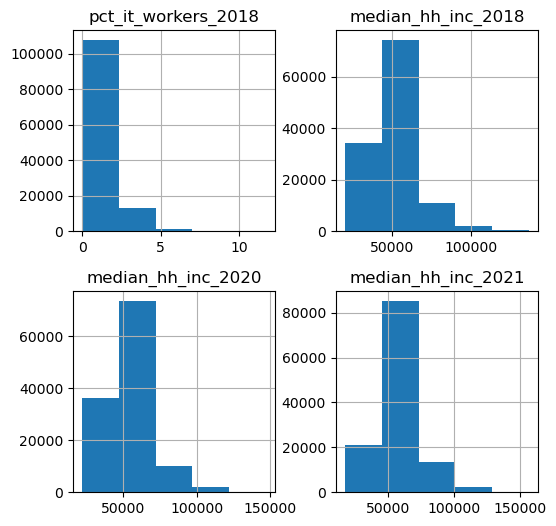

In [22]:
#showing the distribution of the columns with null values
data1 = df_trainMerged[['pct_it_workers_2018','median_hh_inc_2018', 'median_hh_inc_2020', 'median_hh_inc_2021']]
data1.hist(bins = 5, figsize=(6,6))
plt.show()

- The null columns are skewed to the left they are also numerical, therfore, I would be  using the median value for replacing the missing values.


In [23]:
#filling the null values with the median
df_trainMerged['pct_it_workers_2018']= df_trainMerged['pct_it_workers_2018'].fillna(df_trainMerged['pct_it_workers_2018'].median())
df_trainMerged['median_hh_inc_2018']= df_trainMerged['median_hh_inc_2018'].fillna(df_trainMerged['median_hh_inc_2018'].median())
df_trainMerged['median_hh_inc_2020']= df_trainMerged['median_hh_inc_2020'].fillna(df_trainMerged['median_hh_inc_2020'].median())
df_trainMerged['median_hh_inc_2021']= df_trainMerged['median_hh_inc_2021'].fillna(df_trainMerged['median_hh_inc_2021'].median())

## Exploratory Data Analysis

### Most frequent Counties

In [24]:
def chart_plot(plot_data, y, x, title,  yaxis_title, xaxis_title, color_continuous_scale):
    plt.rcParams["figure.figsize"] = (8,6)
    fig = px.bar(plot_data, y= y, x = x, color = x,  color_continuous_scale = color_continuous_scale,
                 labels={'county':'state county'}, height=500,
                title = title )

    # fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.update_layout(yaxis = dict(autorange = 'reversed'),
                       title = dict(
                        x = 0.5,
                        y = 0.95,
                    font = dict(
                    family = 'Arial',
                    color = '#000000')),
                      yaxis_title =  yaxis_title,
                      xaxis_title =  xaxis_title,
            autosize = False,
            width = 700)

    #showing the chart
    fig.show()

In [25]:
#grouping the country based on their count in a descending order
top_county = df_trainMerged['county'].groupby(df_trainMerged['county']).size().sort_values(ascending = False)
top_county = top_county.reset_index(name='counts')
top_county = top_county.head(10)
chart_plot(top_county, 'county', 'counts', 'Most frequent Counties', 'county', 'counts', 'mint')

The most microbusinesses are located in Washington, Jefferson County, Franklin County, and other places.

### Counties with the highest average microbusinesses densities

In [26]:
top_countyM = df_trainMerged.groupby('county')['microbusiness_density'].mean().sort_values(ascending=False)
top_countyM = top_countyM.reset_index()
top_countyM = top_countyM.head(10)
chart_plot(top_countyM, 'county', 'microbusiness_density', 'Counties with the highest density of microbusinesses', 'county', 'microbusiness_density', 'tealrose')

Carson City, Rio Grande and Boundary county have highest average microbusiness density

### The most active counties for microbusinesses

In [27]:
active_countyM = df_trainMerged.groupby('county')['active'].sum().sort_values(ascending=False)
active_countyM = active_countyM.reset_index()
active_countyM = active_countyM.head(10)
chart_plot(active_countyM, 'county', 'active', 'the most active counties for microbusinesses', 'county', 'active_microbusiness', 'tempo')

In [28]:
df_TrainedMerged = df_trainMerged.groupby('month')['microbusiness_density'].mean().reset_index()

#plotting the chart
plt.rcParams["figure.figsize"] = (10,8)
fig = px.line(df_TrainedMerged, x="month", y="microbusiness_density")
fig.update_traces(line=dict( width=3.0))
fig.update_traces(line_color='#456987')


fig.update_layout(title_text ='average microbusiness densities by months', yaxis_title = 'average microbusiness density',
                  xaxis_title = 'month')
#setting the chart properties
fig.update_layout(
    autosize=False,
    width=700,
    height=600,)

#showing the chart
fig.show()

The month of October has the highest average(Peak Period) microbusiness density, followed by the months of July and April.

- Let's look into the number of counties in each state first. To quote Wikipedia:

Texas has the most counties with 254 while Delaware has the fewest with only 3. However, there is one exceptional state: District of Columbia, which also has its own county.

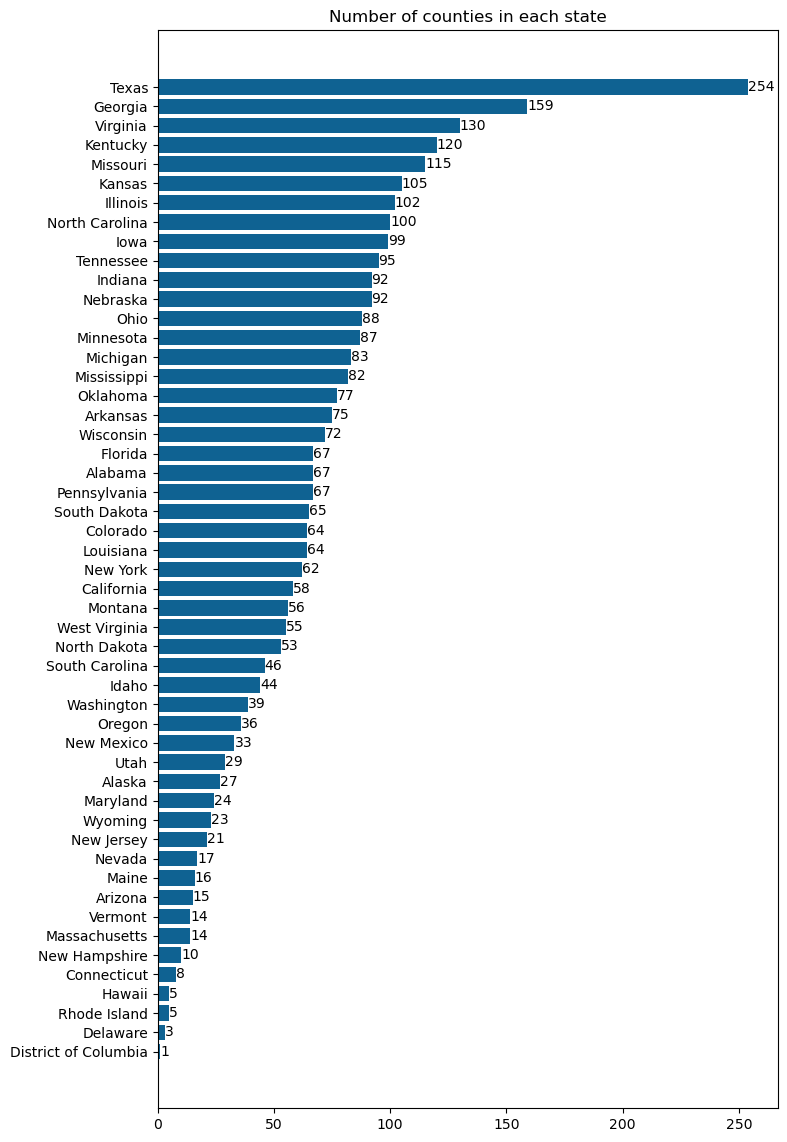

In [29]:
state_c = df_trainMerged[['state', 'cfips']].drop_duplicates(subset=['cfips']).groupby(['state']).size().sort_values()
fig, ax = plt.subplots(figsize=(8,14))
bars = ax.barh(state_c.index, state_c.values,  color='#0F6292')
ax.bar_label(bars)
ax.set_title('Number of counties in each state')
plt.show()

- This is a confirmation to the assertions made on wikipedia

In [30]:
df_trainMerged[['microbusiness_density', 'active']]

,microbusiness_density,active
0,3.007682,1249
1,2.884870,1198
2,3.055843,1269
3,2.993233,1243
4,2.993233,1243
...,...,...
122260,1.803249,101
122261,1.803249,101
122262,1.785395,100
122263,1.785395,100


In [31]:
df_trainMerged["microbusiness_density"].corr(df_trainMerged["active"])

0.3169811826046079

- There is weak correlation between the density of operating microbusinesses and their densities.

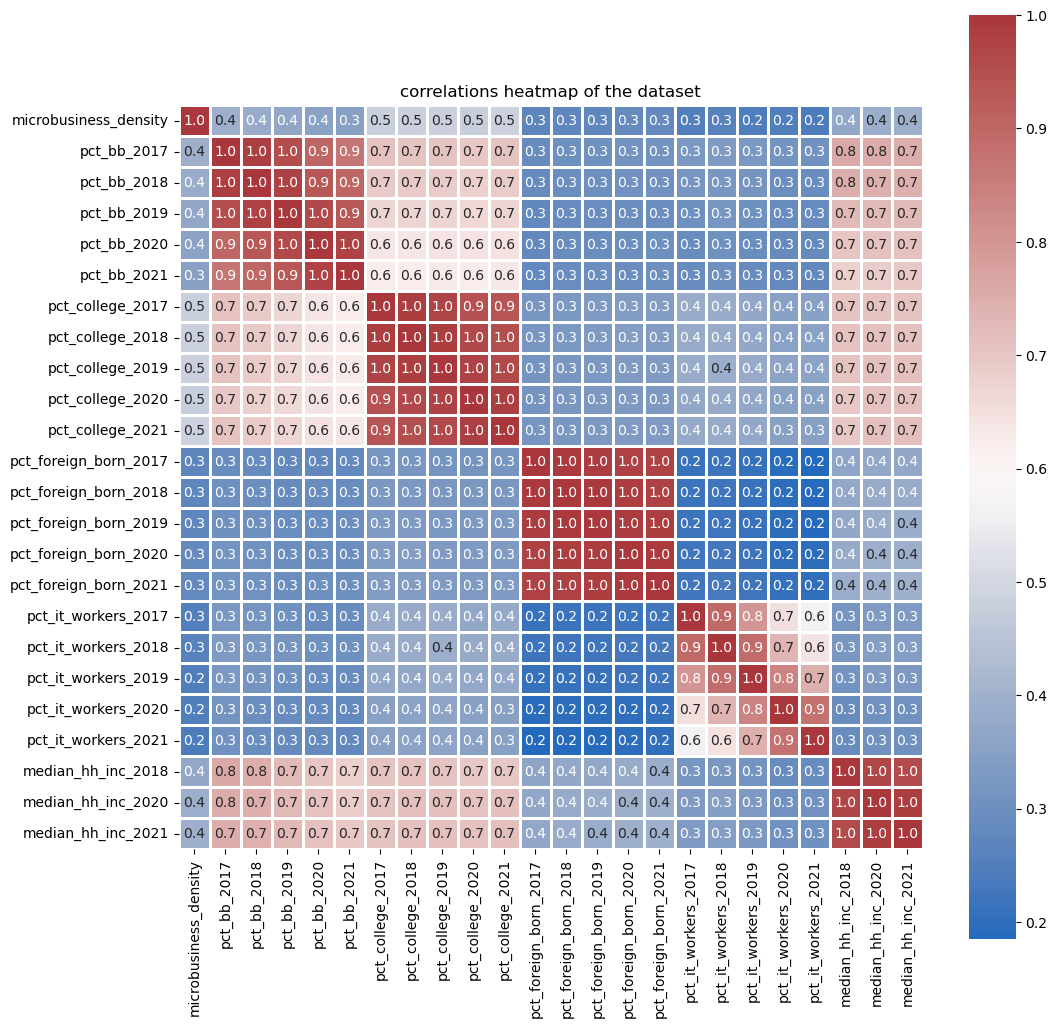

In [32]:
data_float =  df_trainMerged.select_dtypes(include="float")
plt.figure(figsize=(12,12))
sns.heatmap(data_float.corr(), annot=True,  square=True, linecolor='white',linewidths = 2, fmt= '.1f', cmap="vlag")
plt.title('correlations heatmap of the dataset', fontsize= 12)
plt.show()

It is evident that independent characteristics themselves exhibit many collinearities.

### Determining the numerical columns' correlation with the target variable

In [33]:
df_trainMerged.head(2)

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_bb_2017,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,76.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [34]:
# #loan_id will be dropped because it has numeruous unique ids
# df_trainMerged = df_trainMerged.drop('cfips', axis = 1)

#selecting only the numerical columns
numerical_colms = df_trainMerged.select_dtypes('number').columns

In [35]:
#showing the relationship between loan_status and other columns
df_trainMerged.corr()['microbusiness_density'].sort_values(ascending = False)

microbusiness_density    1.000000
pct_college_2021         0.484153
pct_college_2019         0.482557
pct_college_2018         0.481764
pct_college_2017         0.480409
pct_college_2020         0.476635
median_hh_inc_2021       0.394345
pct_bb_2017              0.393485
median_hh_inc_2020       0.391271
pct_bb_2018              0.383592
median_hh_inc_2019       0.383006
median_hh_inc_2018       0.373871
pct_bb_2019              0.371221
median_hh_inc_2017       0.365038
pct_bb_2020              0.355352
pct_bb_2021              0.349566
active                   0.316981
pct_foreign_born_2020    0.284484
pct_foreign_born_2021    0.280956
pct_foreign_born_2018    0.276318
pct_foreign_born_2019    0.275900
pct_foreign_born_2017    0.272928
pct_it_workers_2018      0.259185
pct_it_workers_2017      0.252017
pct_it_workers_2020      0.249607
pct_it_workers_2019      0.246404
pct_it_workers_2021      0.241921
year                     0.017025
month                    0.002121
cfips         

The pct college columns have the strongest association with microbusiness density, despite the fact that they all have weak correlations. This suggests that the percentage of residents who have completed four years of education(college) can predict the number of microbusinesses that will be established in a county.

### Data Skewness

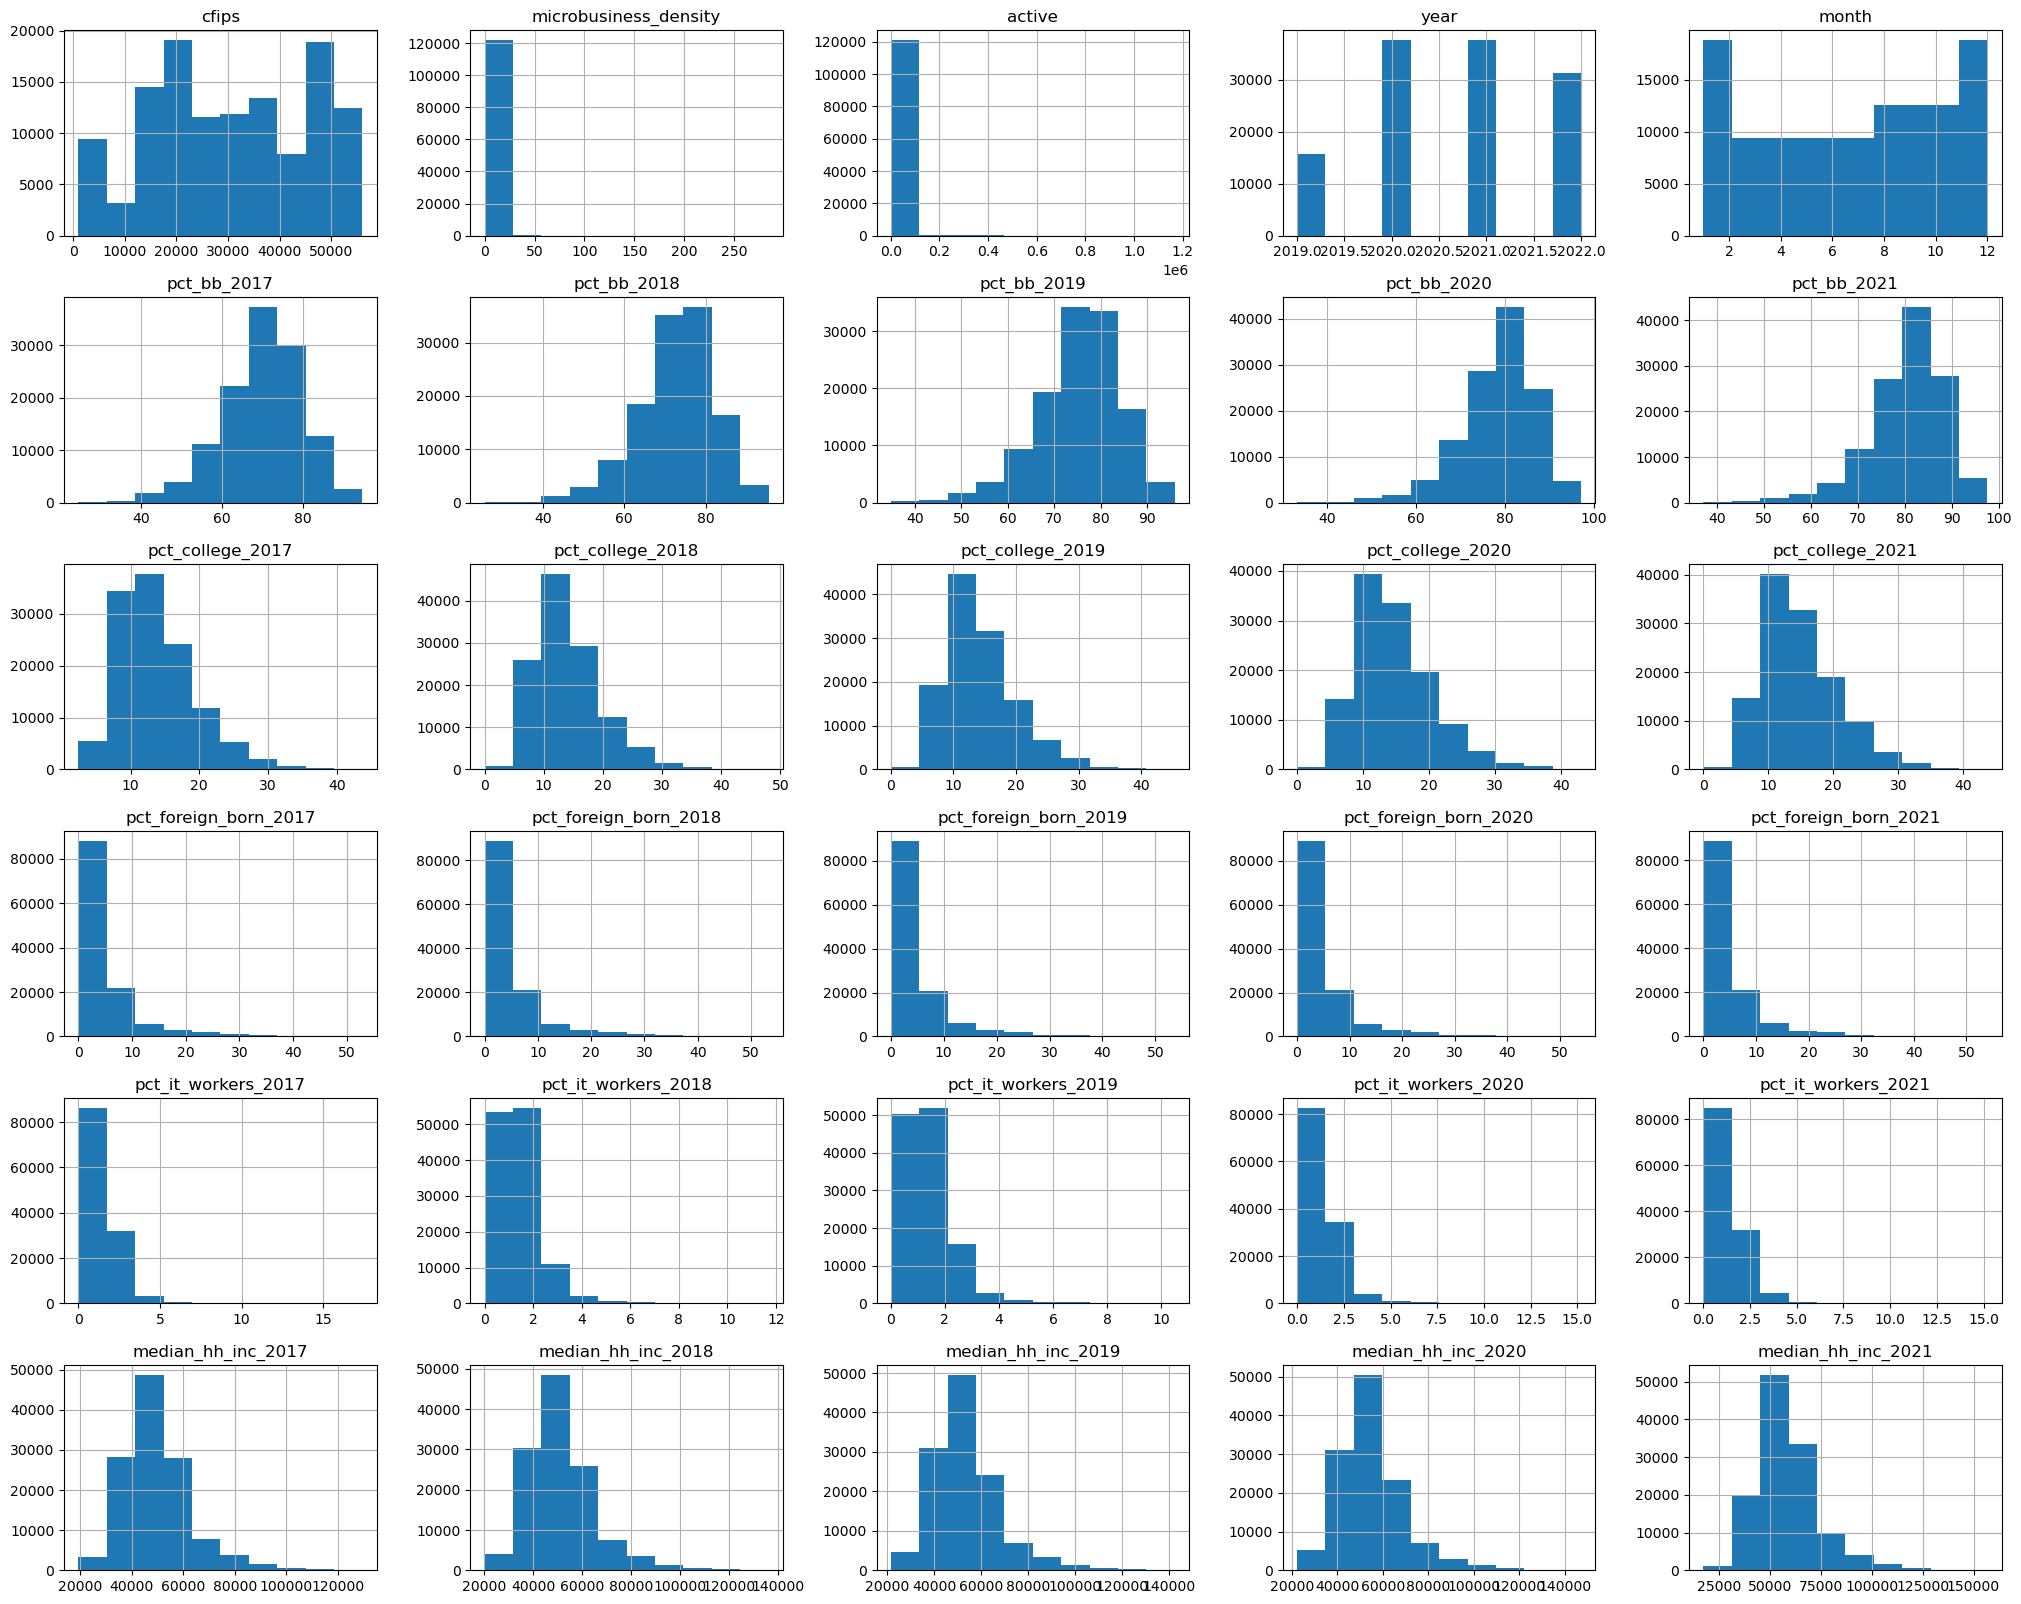

In [36]:
#checking their distribution
# df_trainMerged[numerical_colms] = df_trainMerged[numerical_colms].drop('microbusiness_density', axis = 1)
df_trainMerged[numerical_colms].hist(figsize=[25,20])
plt.show()

In [37]:
#the skewed columns
skew_cols = ['active','pct_foreign_born_2017','pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021', 
             'pct_it_workers_2017', 'pct_it_workers_2018','pct_it_workers_2019','pct_it_workers_2020','pct_it_workers_2021']

- Positive value means the distribution is skewed to the right.
- Negative value means the distribution is skewed to the left.
- 0 means perfect normal distribution. The bell shaped curve.
- This demonstrates that a higher proportion of the dataset is skewed and must therefore be processed.

### Identifying outliers in columns

In [38]:
#looking out for outliers
def outliers_analysis():
        cols_store = []
    
        for col in df_trainMerged.select_dtypes('number'): 
            q1 = df_trainMerged[col].quantile(.25)
            q3 = df_trainMerged[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df_trainMerged[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df_trainMerged[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                cols_store.append(col)

        return cols_store

In [39]:
#using the defined function
out_cols = outliers_analysis()

#these are the ouliers columns 
out_cols = out_cols[2:]

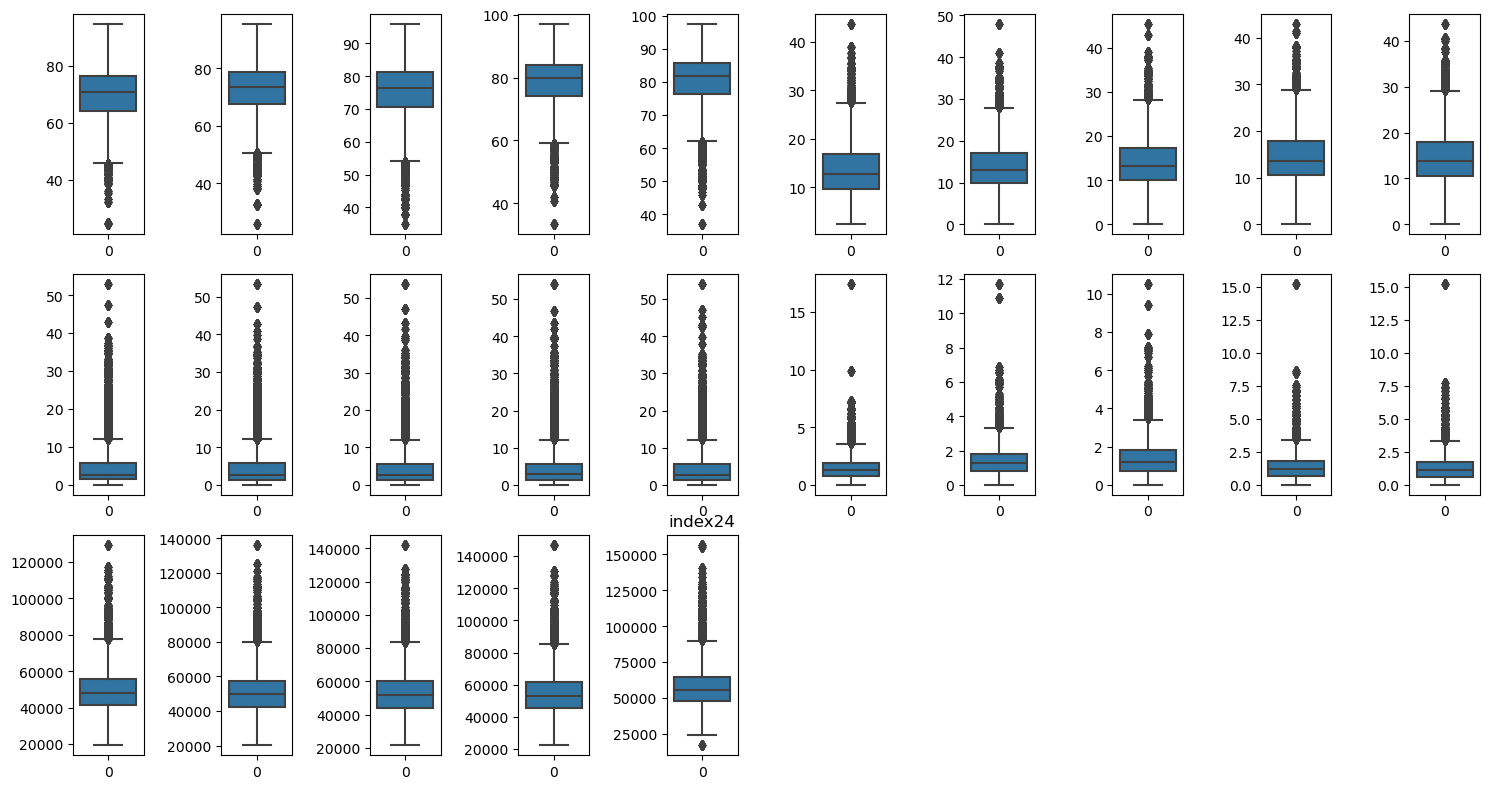

In [40]:

# Visualizing the boxplot for the columns with outliers
plt.figure (figsize=(15,8))
for index, col in enumerate(out_cols):
    plt.subplot (3,10, index+1)
    sns.boxplot(df_trainMerged[col])
plt.tight_layout()
plt.title(f'index{index}')
plt. show()

## Data Preprocessing
- 1.  Dealing with skewed data using log transformation: transform skewed distribution to a normal distribution


In [41]:
#importing the required library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
# transforming skewness in the skewed columns 
df_trainMerged[skew_cols] = df_trainMerged[skew_cols].apply(lambda x: np.log (x + 1))

<function matplotlib.pyplot.show(close=None, block=None)>

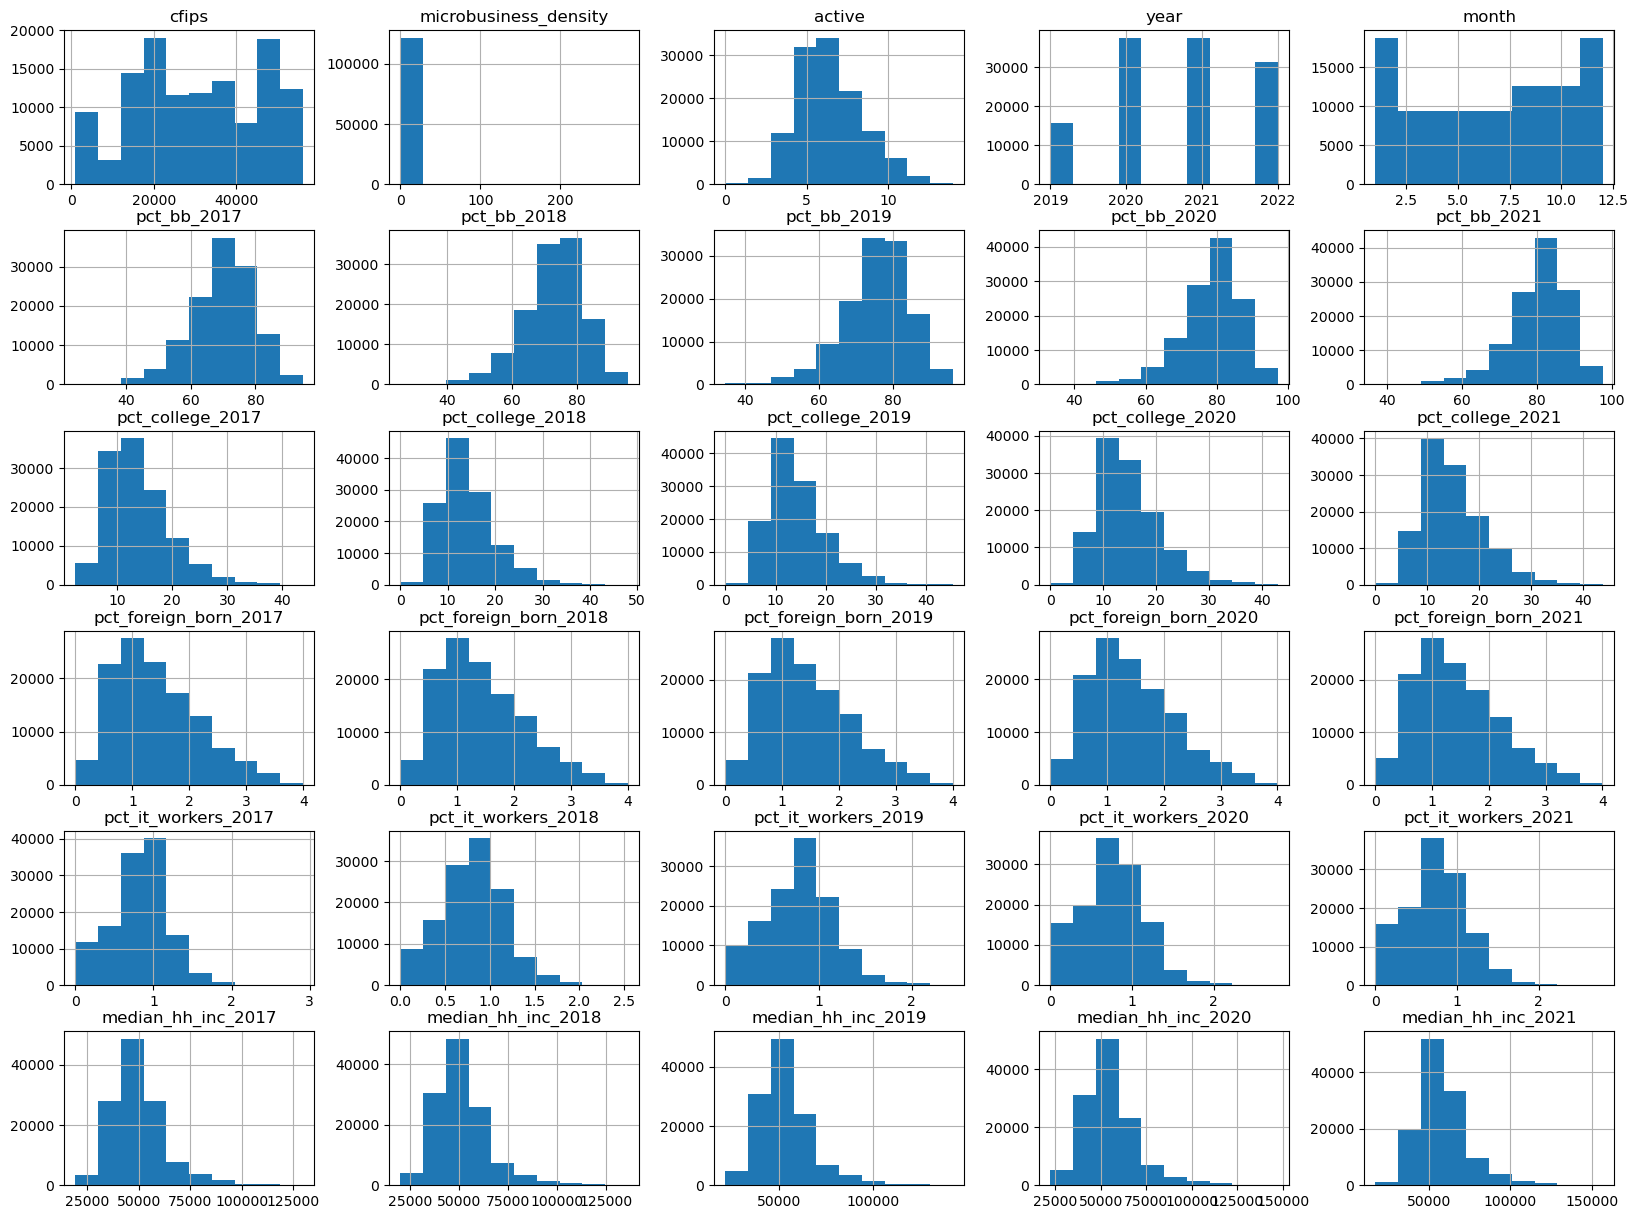

In [43]:
# The figure below shows that the columns have been transformed nicely
df_trainMerged[numerical_colms].hist (figsize=(20, 15))
plt.show

- 2.   Dealing with Outliers using StandardScaler

In [44]:
#importing the required library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
# Scaling the columns with outliers
df_trainMerged[out_cols] = scaler.fit_transform(df_trainMerged[out_cols])
df_trainMerged[out_cols].head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,pct_college_2021,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,0.687244,0.669612,0.586922,0.50249,0.628042,0.122202,0.33562,0.325639,0.356856,0.264212,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.422718,0.524985,0.369067,0.200785,0.283561
1,0.687244,0.669612,0.586922,0.50249,0.628042,0.122202,0.33562,0.325639,0.356856,0.264212,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.422718,0.524985,0.369067,0.200785,0.283561
2,0.687244,0.669612,0.586922,0.50249,0.628042,0.122202,0.33562,0.325639,0.356856,0.264212,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.422718,0.524985,0.369067,0.200785,0.283561
3,0.687244,0.669612,0.586922,0.50249,0.628042,0.122202,0.33562,0.325639,0.356856,0.264212,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.422718,0.524985,0.369067,0.200785,0.283561
4,0.687244,0.669612,0.586922,0.50249,0.628042,0.122202,0.33562,0.325639,0.356856,0.264212,...,0.046871,-0.15328,-0.668881,-0.751035,-0.009129,0.422718,0.524985,0.369067,0.200785,0.283561


### Data Modelling

In [46]:
feature_d = df_trainMerged[['cfips','month', 'year']]


## Data modeling

In [47]:
#importing the sci-kit learn libraries

# Random Forests
from sklearn.ensemble import RandomForestRegressor


#r2_score
from sklearn.metrics import r2_score


# For splitting the dataset 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [48]:
X = feature_d
y = df_trainMerged.microbusiness_density

In [49]:
# splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.2)

In [50]:
print(X_train,X_test,y_train,y_test)

        cfips  month  year
81750   39113      2  2020
2121     1109     11  2020
105191  48357      4  2020
78527   38053      4  2021
94987   47023      6  2021
...       ...    ...   ...
119879  55067      4  2022
103694  48279      4  2022
860      1045     10  2019
15795   13043      8  2019
121958  56031      1  2020

[97812 rows x 3 columns]         cfips  month  year
27972   18045      5  2020
18285   13169      5  2022
42532   21199      6  2021
119017  55023     12  2021
49542   26083      8  2020
...       ...    ...   ...
31476   19041     11  2019
52858   27087      9  2020
101073  48145      8  2021
89635   42115      9  2020
27671   18029      4  2021

[24453 rows x 3 columns] 81750     7.467691
2121      1.820280
105191    1.695634
78527     3.453190
94987     1.426962
            ...   
119879    2.103560
103694    1.656930
860       1.360328
15795     3.176948
121958    3.890260
Name: microbusiness_density, Length: 97812, dtype: float64 27972     1.683292
18285     1.9

### RandomForest

In [51]:
model = RandomForestRegressor(bootstrap=True, random_state=42, n_jobs=-1)
#fitting the model to the dataset
model.fit(X_train, y_train)

# train the model
RF_training_prediction = model.predict(X_train)
RF_testing_prediction = model.predict(X_test)

In [52]:
RF_testing_prediction 

array([1.64115997, 1.96928281, 3.31838355, ..., 1.39914748, 2.06214915,
       2.83839566])

In [53]:
#measuring the precision of the model 
from sklearn.metrics import r2_score
print('The performance of the model on the training dataset is',r2_score(RF_training_prediction, y_train))
print('The performance of the model on the testing dataset is',r2_score(RF_testing_prediction, y_test))

The performance of the model on the training dataset is 0.9786166612703713
The performance of the model on the testing dataset is 0.8801288444976223


### XGBoost

In [54]:
from xgboost import XGBRegressor

In [55]:
# splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size= 0.33)

In [56]:
xg_reg = XGBRegressor(n_estimators = 1000)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [57]:
preds_test = xg_reg.predict(X_test)
preds_train = xg_reg.predict(X_train)
preds_test

array([2.3587909, 7.658296 , 1.9165802, ..., 3.804218 , 2.6065063,
       3.616121 ], dtype=float32)

In [58]:
#calculating the rmse by using the mean_sqaured_error function from sklearn's metrics module
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_test))
print("RMSE: %f" % (rmse))

RMSE: 1.269668


In [59]:
rmse = np.sqrt(mean_squared_error(y_train, preds_train))
print("RMSE: %f" % (rmse))

RMSE: 0.386446


In [60]:
df_testMerged["microbusiness_density"] = pd.Series(preds_test).astype(float)
df_testMerged.drop(columns=['cfips','year','month','pct_bb','pct_college','pct_foreign_born','pct_it_workers','median_hh_inc'], axis=1, inplace=True)
df_testMerged["microbusiness_density"] = df_testMerged["microbusiness_density"].fillna(0.0)
df_testMerged.head()

,row_id,microbusiness_density
0,1001_2022-11-01,2.358791
1,1003_2022-11-01,7.658296
2,1005_2022-11-01,1.916580
3,1007_2022-11-01,5.965449
4,1009_2022-11-01,2.742189


In [61]:
#Make csv of above dataframe sub  
df_testMerged.to_csv('submission.csv',  index=False)

 ## Conclusions
From the overall analysis, certain conclusions have been drawn, which include the following:
- Areas with the highest concentration of microbusinesses include Washington, Jefferson County, Franklin County, and other regions. 
- Los Angeles, Orange County, Maricopa County, and other locations have the most active microbusinesses. 
- Carson City, Rio Grande, and Boundary County have the greatest average microbusiness density.
- The highest average (Peak Period) microbusiness density is found in the month of October, followed by the months of July and April. 
- Independent features clearly show a great deal of collinearity.
<!-- - RMSE prediction for test dataset using XGBOOST is 3.9 -->